In [1]:
import rasterio

In [2]:
#import required libraries
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
import os
os.listdir()

['subset_0_of_LC08_L2SP_173033_20200801_20200914_02_T1_SR_B4_band_1.tif',
 'subset_1_of_LC08_L2SP_173033_20200801_20200914_02_T1_SR_B5_band_1.tif']

In [7]:
#import bands as separate 1 band raster
band4 = rasterio.open('subset_0_of_LC08_L2SP_173033_20200801_20200914_02_T1_SR_B4_band_1.tif') #red
band5 = rasterio.open('subset_1_of_LC08_L2SP_173033_20200801_20200914_02_T1_SR_B5_band_1.tif') #nir

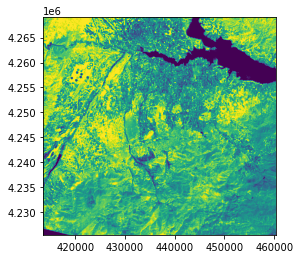

C:\Users\yamem\anaconda3\envs\rs_spec_top\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


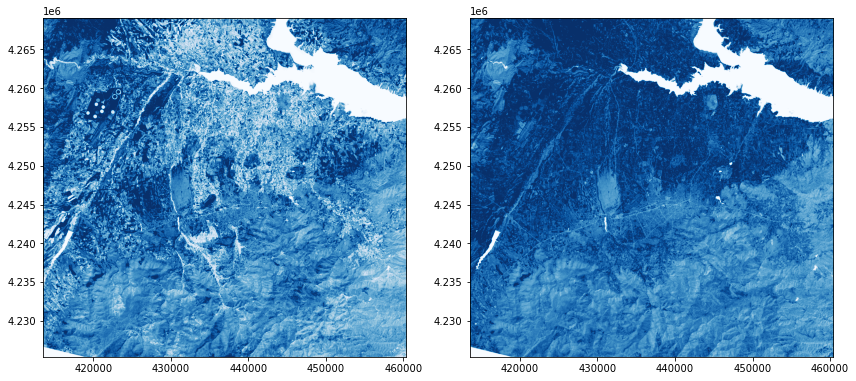

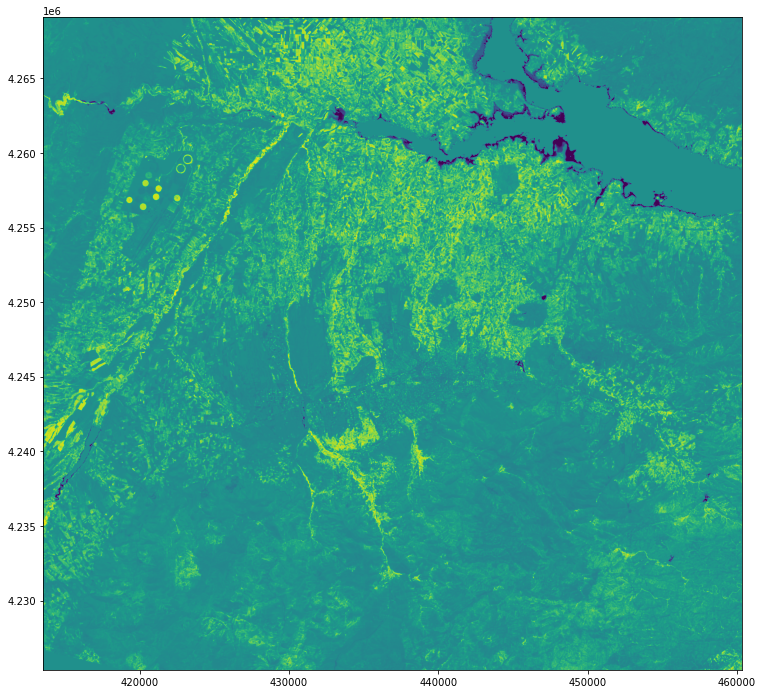

<AxesSubplot:>

In [9]:
#number of raster rows
band4.height
#number of raster columns
band4.width
#plot band 
plot.show(band4)
#type of raster byte
band4.dtypes[0]
#raster sytem of reference
band4.crs
#raster transform parameters
band4.transform
#raster values as matrix array
band4.read(1)
#multiple band representation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot.show(band4, ax=ax1, cmap='Blues') #red
plot.show(band5, ax=ax2, cmap='Blues') #nir
fig.tight_layout()
#generate nir and red objects as arrays in float64 format
red = band4.read(1).astype('float64')
nir = band5.read(1).astype('float64')

nir
#ndvi calculation, empty cells or nodata cells are reported as 0
ndvi=np.where(
    (nir+red)==0., 
    0, 
    (nir-red)/(nir+red))
ndvi[:5,:5]
#export ndvi image
ndviImage = rasterio.open('C:/Users/yamem/rs_spec_top/ndviImage.tiff','w',driver='Gtiff',
                          width=band4.width, 
                          height = band4.height, 
                          count=1, crs=band4.crs, 
                          transform=band4.transform, 
                          dtype='float64')
ndviImage.write(ndvi,1)
ndviImage.close()
#plot ndvi
ndvi = rasterio.open('C:/Users/yamem/rs_spec_top/ndviImage.tiff')
fig = plt.figure(figsize=(18,12))
plot.show(ndvi)